In [1]:
import pandas as pd
import numpy as np
import os
import mne
import mne
import scipy
import librosa
import matplotlib.pyplot as plt
import librosa.display
from scipy.io import wavfile
import warnings

## Reading in EDF file

In [2]:
b = mne.io.read_raw_edf('./sub-02/eeg/sub-02_task-run3_eeg.edf')

b

Extracting EDF parameters from /Users/rakesh/Downloads/COGS138/COGS138_Music/sub-02/eeg/sub-02_task-run3_eeg.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


/var/folders/1_/1fj443x17f1f_17vd86ds4p40000gn/T/ipykernel_10054/1910269754.py:1: RuntimeWarning: Invalid date encountered (2014-00-00 00:00:00).
  b = mne.io.read_raw_edf('./sub-02/eeg/sub-02_task-run3_eeg.edf')


<RawEDF | sub-02_task-run3_eeg.edf, 37 x 963000 (963.0 s), ~40 kB, data not loaded>

## Plotting channel outputs

Using matplotlib as 2D backend.


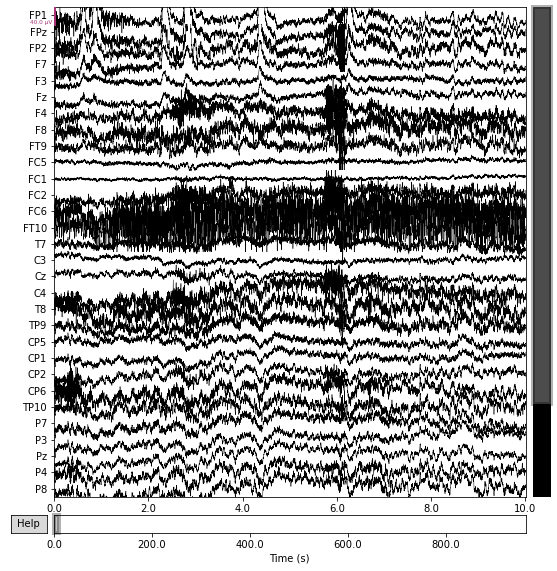

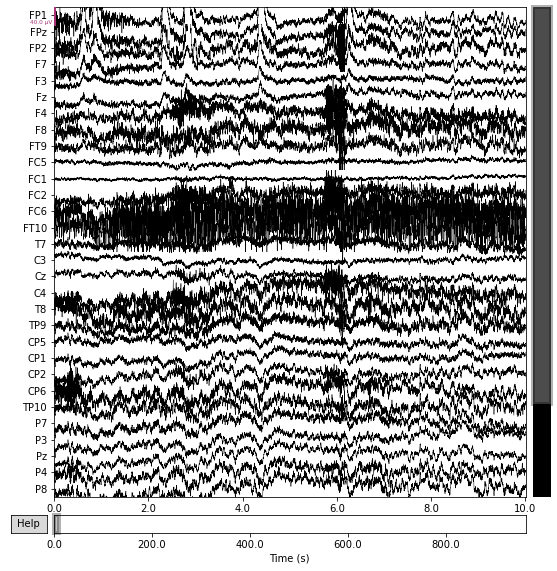

In [3]:
b.plot(n_channels=30)

## Plotting PSDs

Effective window size : 2.048 (s)


/var/folders/1_/1fj443x17f1f_17vd86ds4p40000gn/T/ipykernel_10054/3948141362.py:1: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  b.plot_psd(fmax=50)


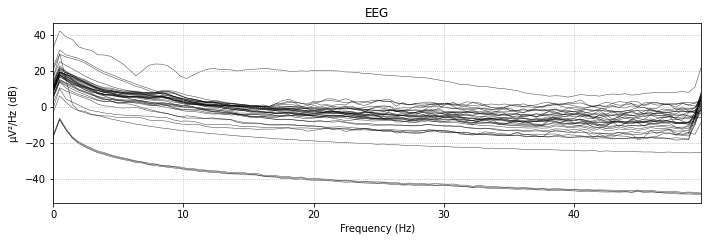

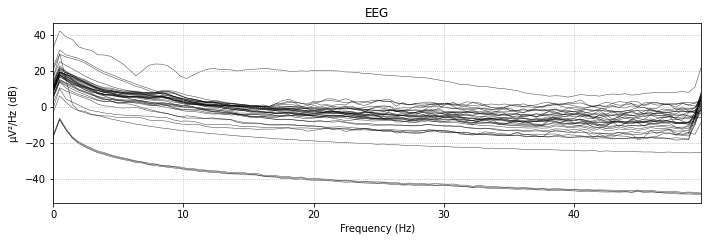

In [4]:
b.plot_psd(fmax=50)

## Initializing data of events from the run

In [5]:
init_df = pd.read_csv('./sub-02/eeg/sub-02_task-run2_events.tsv', sep = '\t')
wav_files = ['hvha1.wav', 'hvha10.wav', 'hvha11.wav', 'hvha12.wav', 'hvha2.wav','hvha3.wav', 'hvha4.wav', 'hvha5.wav', 'hvha6.wav', 'hvha7.wav',        'hvha8.wav', 'hvha9.wav', 'hvla1.wav', 'hvla10.wav', 'hvla11.wav',       'hvla12.wav', 'hvla2.wav', 'hvla3.wav', 'hvla4.wav', 'hvla5.wav',        'hvla6.wav', 'hvla7.wav', 'hvla8.wav', 'hvla9.wav',         'hvna1.wav', 'hvna10.wav', 'hvna11.wav', 'hvna12.wav', 'hvna2.wav',         'hvna3.wav', 'hvna4.wav', 'hvna5.wav', 'hvna6.wav', 'hvna7.wav' ,         'hvna8.wav', 'hvna9.wav', 'lvha1.wav', 'lvha10.wav', 'lvha11.wav',         'lvha12.wav', 'lvha2.wav', 'lvha3.wav' ,'lvha4.wav', 'lvha5.wav',         'lvha6.wav', 'lvha7.wav', 'lvha8.wav', 'lvha9.wav', 'lvla1.wav' ,         'lvla10.wav', 'lvla11.wav', 'lvla12.wav', 'lvla2.wav', 'lvla3.wav',         'lvla4.wav', 'lvla5.wav',  'lvla6.wav', 'lvla7.wav', 'lvla8.wav' ,         'lvla9.wav', 'lvna1.wav', 'lvna10.wav', 'lvna11.wav' , 'lvna12.wav',         'lvna2.wav', 'lvna3.wav', 'lvna4.wav', 'lvna5.wav', 'lvna6.wav',         'lvna7.wav', 'lvna8.wav', 'lvna9.wav', 'nvha1.wav', 'nvha10.wav',         'nvha11.wav', 'nvha12.wav', 'nvha2.wav', 'nvha3.wav', 'nvha4.wav',         'nvha5.wav', 'nvha6.wav', 'nvha7.wav', 'nvha8.wav', 'nvha9.wav',         'nvla1.wav', 'nvla10.wav', 'nvla11.wav', 'nvla12.wav', 'nvla2.wav',         'nvla3.wav', 'nvla4.wav', 'nvla5.wav', 'nvla6.wav', 'nvla7.wav',         'nvla8.wav', 'nvla9.wav', 'nvna1.wav', 'nvna10.wav', 'nvna11.wav',         'nvna12.wav', 'nvna2.wav', 'nvna3.wav', 'nvna4.wav', 'nvna5.wav',         'nvna6.wav', 'nvna7.wav', 'nvna8.wav', 'nvna9.wav']
song_types = ['LVLA', 'NVLA','HVLA', 'LVNA', 'NVNA', 'HVNA', 'LVHA','NVHA','HVHA']
df = pd.DataFrame({'onset': init_df['onset'].iloc[::2].values, 'song_type':init_df['trial_type'].iloc[::2].values, 'song_value':init_df['trial_type'].iloc[1::2].values})
df['song_value'] = df['song_value'] - 100
list_of_songs = []
for i in df.song_value:
    file_name = wav_files[i-1]
    list_of_songs.append(file_name)
df['song_files'] = list_of_songs
song_longName = []
for i in df['song_type']:
    song_longName.append(song_types[i-1])
df['song_longName'] = song_longName
    

In [6]:
df

,onset,song_type,song_value,song_files,song_longName
0,9.598,4,77,nvha2.wav,LVNA
1,72.550,4,26,hvna10.wav,LVNA
2,124.869,3,97,nvna1.wav,HVLA
3,171.700,6,100,nvna12.wav,HVNA
4,239.931,7,106,nvna7.wav,LVHA
5,285.959,6,20,hvla5.wav,HVNA
6,336.001,5,33,hvna6.wav,NVNA
7,389.908,9,55,lvla4.wav,HVHA
8,442.943,3,50,lvla10.wav,HVLA
9,511.448,2,10,hvha7.wav,NVLA


## Access tempo data for each .wav file

In [7]:
wav_tempo_data = []
warnings.filterwarnings('ignore')
for j in range(len(list_of_songs)):
    rate, wav_file = wavfile.read('./stimuli/' + list_of_songs[j])
    wav_array = np.array(wav_file.T,dtype=float)
    tempo_vals = librosa.beat.tempo(wav_array, sr=1000)
    wav_tempo_data.append(tempo_vals)
df['tempo'] = pd.Series(wav_tempo_data)
df

,onset,song_type,song_value,song_files,song_longName,tempo
0,9.598,4,77,nvha2.wav,LVNA,"[[117.1875], [117.1875]]"
1,72.550,4,26,hvna10.wav,LVNA,"[[117.1875], [117.1875]]"
2,124.869,3,97,nvna1.wav,HVLA,"[[117.1875], [117.1875]]"
3,171.700,6,100,nvna12.wav,HVNA,"[[117.1875], [117.1875]]"
4,239.931,7,106,nvna7.wav,LVHA,"[[117.1875], [117.1875]]"
5,285.959,6,20,hvla5.wav,HVNA,"[[117.1875], [117.1875]]"
6,336.001,5,33,hvna6.wav,NVNA,"[[117.1875], [117.1875]]"
7,389.908,9,55,lvla4.wav,HVHA,"[[117.1875], [117.1875]]"
8,442.943,3,50,lvla10.wav,HVLA,"[[117.1875], [117.1875]]"
9,511.448,2,10,hvha7.wav,NVLA,"[[117.1875], [117.1875]]"


## Get epochs for time stamps in the reading

In [8]:
# epoch data - create an epoch for each song presentation
start_times = df['onset']

# settings
FS = 1000 # sampling frequency
DURATION = 21 # song duration (sec)

# get EEG data from MNE object
eeg = b.get_data()

# initialize matrix for epoched data
n_samples = FS * DURATION # calculate number of EEG samples per epoch
n_channels = eeg.shape[0] # count number of channels
epochs = np.zeros([len(start_times), n_channels, n_samples])

# loop through song start times
for i_st, st in enumerate(start_times):
    # get index of start and end time for epoch 
    start = int(st * 1000)
#     end = start + n_samples - 1
    end = start + n_samples
    
    # aggregate data
    epochs[i_st] = eeg[:, start:end]

In [19]:
eeg[:]

array([[-5.98511863e-05, -6.72071141e-05, -8.66631838e-05, ...,
         1.22389000e-03,  1.22389000e-03,  1.22389000e-03],
       [-4.54422583e-05, -5.31681138e-05, -3.61169652e-05, ...,
         3.82950000e-04,  3.82950000e-04,  3.82950000e-04],
       [-3.03056755e-05, -2.99704348e-05, -3.10675861e-05, ...,
         3.49202000e-04,  3.49202000e-04,  3.49202000e-04],
       ...,
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         8.54565000e-06,  8.54565000e-06,  8.54565000e-06],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         9.00000000e-06,  9.00000000e-06,  9.00000000e-06],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         9.00000000e-06,  9.00000000e-06,  9.00000000e-06]])

# Average CZ over all songs

In [44]:
## NEED TO DO

## FIND WAY TO SEGMENT DATA FROM PSD WELCH 

events_input = np.array([start_times, np.zeros(len(start_times)), np.zeros(len(start_times))])
epoched_B = mne.Epochs(b, events = start_times)
epoched_B
# Sample a 1-100Hz with 1Hz spacing

# alpha_psd_welches = mne.time_frequency.psd_welch(b, fmin = 8, fmax = 13)
# alpha_cz = alpha_psd_welches[0][16]
# alpha_cz
# Can use dual conditional statement on 2nd array to get indices for the 1st

TypeError: cannot convert the series to <class 'int'>

## Get the CZ readings for each song in the EEG reading

In [27]:
cz_readings = epochs[:, 16]
cz_readings

array([[ 2.10379378e-05,  2.00228144e-05,  2.14361354e-05, ...,
         3.17051470e-05,  3.32082027e-05,  3.42962356e-05],
       [ 3.88166197e-05,  3.76500690e-05,  3.71453115e-05, ...,
        -1.59202478e-06, -2.61275668e-06, -2.29307691e-06],
       [-9.69057894e-06, -8.45111878e-06, -7.04340611e-06, ...,
        -1.88547323e-05, -1.86416125e-05, -1.73572850e-05],
       ...,
       [-3.52537436e-05, -3.44068727e-05, -3.42330117e-05, ...,
        -7.44160372e-06, -7.48086264e-06, -7.72763298e-06],
       [-1.99371568e-05, -1.94997003e-05, -1.97408622e-05, ...,
         8.21865084e-05,  8.20911653e-05,  8.30950720e-05],
       [ 1.18542405e-07,  2.51894488e-06,  8.02769280e-07, ...,
        -4.11313647e-05, -4.23035238e-05, -4.08565522e-05]])

In [33]:
alpha_cz_psds = []
for i in cz_readings:
    alpha_cz = mne.time_frequency.psd_welch(i, fmin = 8, fmax = 13)
    alpha_cz_psds.append(alpha_cz)
alpha_cz_psds

ValueError: epochs must be an instance of Epochs, Raw, orEvoked. Got type <class 'numpy.ndarray'>